### Introduction to Data Science 
# Practical Exam

**Exam Brief:** You are given the dataset of Hourly London Air Quality over 2020 for 4 locations in separate borough which should be the main focus of your work. I have also provided two additional datasets of hourly wage and ethnic makeup by boroughs that may optionally included to support air quality insights. Your brief is to create Jupyter Notebook that provides some insightful summary of the contents of the dataset.




### About the Data 

**Name of the dataset:** air_quality_4_boroughs_2020.csv 

**Name of the additional datasets:** hourly_wage_by_borough_2020.csv / ethic-group-by-borough_2020.csv

**Datasets' Source:** https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/data/practical_exam_2021/

**Information about the main dataset's contents:** "Nitrogen Oxides (NO, NO2, NOx) > Nitrogen oxides are a group of seven gases and compounds composed of nitrogen and oxygen, sometimes collectively known as NOx gases.The two most common and hazardous oxides of nitrogen are nitric oxide(NO) and nitrogen dioxide(NO2). NOx molecules have nitrogen and oxygen atoms in them. Nitrogen oxides (NOx) is a collective term used to refer to nitrogen monoxide (nitric oxide or NO) and nitrogen dioxide (NO2). NO2 is both a primary and secondary pollutant. Air pollution impacts everyone but some of us are more susceptible than others: children and seniors, people with existing lung and heart conditions, people working and exercising outdoors. Air quality measurement are commonly reported in terms of: micrograms per cubic meter (µg/m3) parts per million (ppm) or parts per billion (ppb)." (Tagle, 2021)



***

### Loading and Preprocessing the Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import preprocessing
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#From Louis McCallum - https://github.com/free-to-learn/Machine-Learning-Concepts/blob/master/Linear_Regression_Practice.ipynb

#Show max 100 columns or rows
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100)
#Dont use scientific notation for numbers (e.g 1.003767687e-12)
pd.set_option('display.float_format','{:.5f}'.format)
np.set_printoptions(suppress=True)

#Read in the dataset - set time column as time
df = pd.read_csv("data/air_quality_4_boroughs_2020.csv")

df

,Site,NO2,NOX,NO,ReadingDateTime,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std
0,Barking and Dagenham,NaN,NaN,NaN,01/01/2020 00:00,0.00000,NaN,NaN,NaN,NaN,NaN,NaN
1,Barking and Dagenham,31.80000,42.00000,6.70000,01/01/2020 01:00,1.00000,NaN,NaN,NaN,NaN,NaN,NaN
2,Barking and Dagenham,31.40000,47.70000,10.60000,01/01/2020 02:00,2.00000,NaN,NaN,NaN,NaN,NaN,NaN
3,Barking and Dagenham,30.00000,51.50000,14.10000,01/01/2020 03:00,3.00000,NaN,NaN,NaN,NaN,NaN,NaN
4,Barking and Dagenham,29.00000,50.60000,14.10000,01/01/2020 04:00,4.00000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
35131,Sutton,NaN,NaN,NaN,31/12/2020 19:00,8779.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001
35132,Sutton,NaN,NaN,NaN,31/12/2020 20:00,8780.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001
35133,Sutton,NaN,NaN,NaN,31/12/2020 21:00,8781.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001
35134,Sutton,NaN,NaN,NaN,31/12/2020 22:00,8782.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001


In [3]:
#Show amount of NaN for each column
df.isnull().sum()

Site                         0
NO2                       1323
NOX                       1320
NO                        1320
ReadingDateTime              0
Since_start_of_year          0
NO2_rolling_daily_mean      23
NOX_rolling_daily_mean      23
NO_rolling_daily_mean       23
NOX_rolling_daily_std       23
NO2_rolling_daily_std       23
NO_rolling_daily_std        23
dtype: int64

In [4]:
#See each unique values in this column
df["Site"].unique()

array(['Barking and Dagenham', 'Hackney', 'Lewisham', 'Sutton'],
      dtype=object)

In [5]:
#Adapted from Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Datascience%20Week%201%20-%20Pandas.ipynb

#Filtering by pick values (unique values) within a column and see its mean
print("Mean Values | Barking and Dagenham")
print(df[df["Site"]=="Barking and Dagenham"].mean())

print("\nMean Values | Hackney")
print(df[df["Site"]=="Hackney"].mean())

print("\nMean Values | Lewisham")
print(df[df["Site"]=="Lewisham"].mean())

print("\nMean Values | Sutton")
print(df[df["Site"]=="Sutton"].mean())

Mean Values | Barking and Dagenham
NO2                        16.08106
NOX                        24.62397
NO                          5.57328
Since_start_of_year      4391.50000
NO2_rolling_daily_mean     15.65142
NOX_rolling_daily_mean     23.95883
NO_rolling_daily_mean       5.41963
NOX_rolling_daily_std      13.29158
NO2_rolling_daily_std       7.27043
NO_rolling_daily_std        4.77712
dtype: float64

Mean Values | Hackney
NO2                        36.45920
NOX                        66.45351
NO                         19.56716
Since_start_of_year      4391.50000
NO2_rolling_daily_mean     35.64224
NOX_rolling_daily_mean     64.98815
NO_rolling_daily_mean      19.13605
NOX_rolling_daily_std      27.74779
NO2_rolling_daily_std      11.43278
NO_rolling_daily_std       11.65601
dtype: float64

Mean Values | Lewisham
NO2                        28.95166
NOX                        55.48165
NO                         17.30180
Since_start_of_year      4391.50000
NO2_rolling_daily_mean  

In [6]:
#From https://www.codegrepper.com/code-examples/python/pandas+fill+nan+with+mean+of+the+groupby

# CHANGE NaN to MEAN by sites' unique values
df_mean = df.groupby("Site").transform(lambda x: x.fillna(x.mean()))
df_mean

,NO2,NOX,NO,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std
0,16.08106,24.62397,5.57328,0.00000,15.65142,23.95883,5.41963,13.29158,7.27043,4.77712
1,31.80000,42.00000,6.70000,1.00000,15.65142,23.95883,5.41963,13.29158,7.27043,4.77712
2,31.40000,47.70000,10.60000,2.00000,15.65142,23.95883,5.41963,13.29158,7.27043,4.77712
3,30.00000,51.50000,14.10000,3.00000,15.65142,23.95883,5.41963,13.29158,7.27043,4.77712
4,29.00000,50.60000,14.10000,4.00000,15.65142,23.95883,5.41963,13.29158,7.27043,4.77712
...,...,...,...,...,...,...,...,...,...,...
35131,39.41351,82.63000,28.18465,8779.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001
35132,39.41351,82.63000,28.18465,8780.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001
35133,39.41351,82.63000,28.18465,8781.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001
35134,39.41351,82.63000,28.18465,8782.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001


In [7]:
df.dtypes

Site                       object
NO2                       float64
NOX                       float64
NO                        float64
ReadingDateTime            object
Since_start_of_year       float64
NO2_rolling_daily_mean    float64
NOX_rolling_daily_mean    float64
NO_rolling_daily_mean     float64
NOX_rolling_daily_std     float64
NO2_rolling_daily_std     float64
NO_rolling_daily_std      float64
dtype: object

In [8]:
#Adapted from Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Datascience%20Week%201%20-%20Pandas.ipynb

# Convert object to datetime64
df['ReadingDateTime'] = pd.to_datetime(df['ReadingDateTime'])

In [9]:
# Select columns 
df_site_time = df[['Site', 'ReadingDateTime']]

In [10]:
#From from Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Data%20Science%20Week%204%20-%20Regression%20.ipynb

#Concat Site feature with dataset
df_clean = pd.concat([df_site_time, df_mean], axis=1)
# RENAME columns
df_clean = df_clean.rename({'Site':'Borough'}, axis=1)
df_clean 

,Borough,ReadingDateTime,NO2,NOX,NO,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std
0,Barking and Dagenham,2020-01-01 00:00:00,16.08106,24.62397,5.57328,0.00000,15.65142,23.95883,5.41963,13.29158,7.27043,4.77712
1,Barking and Dagenham,2020-01-01 01:00:00,31.80000,42.00000,6.70000,1.00000,15.65142,23.95883,5.41963,13.29158,7.27043,4.77712
2,Barking and Dagenham,2020-01-01 02:00:00,31.40000,47.70000,10.60000,2.00000,15.65142,23.95883,5.41963,13.29158,7.27043,4.77712
3,Barking and Dagenham,2020-01-01 03:00:00,30.00000,51.50000,14.10000,3.00000,15.65142,23.95883,5.41963,13.29158,7.27043,4.77712
4,Barking and Dagenham,2020-01-01 04:00:00,29.00000,50.60000,14.10000,4.00000,15.65142,23.95883,5.41963,13.29158,7.27043,4.77712
...,...,...,...,...,...,...,...,...,...,...,...,...
35131,Sutton,2020-12-31 19:00:00,39.41351,82.63000,28.18465,8779.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001
35132,Sutton,2020-12-31 20:00:00,39.41351,82.63000,28.18465,8780.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001
35133,Sutton,2020-12-31 21:00:00,39.41351,82.63000,28.18465,8781.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001
35134,Sutton,2020-12-31 22:00:00,39.41351,82.63000,28.18465,8782.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001


In [11]:
print("Missing Data Before: ")
print(df.isnull().sum())

print("\nMissing Data After: ")
print(df_clean.isnull().sum())

Missing Data Before: 
Site                         0
NO2                       1323
NOX                       1320
NO                        1320
ReadingDateTime              0
Since_start_of_year          0
NO2_rolling_daily_mean      23
NOX_rolling_daily_mean      23
NO_rolling_daily_mean       23
NOX_rolling_daily_std       23
NO2_rolling_daily_std       23
NO_rolling_daily_std        23
dtype: int64

Missing Data After: 
Borough                   0
ReadingDateTime           0
NO2                       0
NOX                       0
NO                        0
Since_start_of_year       0
NO2_rolling_daily_mean    0
NOX_rolling_daily_mean    0
NO_rolling_daily_mean     0
NOX_rolling_daily_std     0
NO2_rolling_daily_std     0
NO_rolling_daily_std      0
dtype: int64


In [12]:
#From from Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Data%20Science%20Week%204%20-%20Regression%20.ipynb

# Select columns to work with
df_readings_borough = df_clean[['Borough', 'ReadingDateTime', 'NO2', 'NOX', 'NO']]
df_readings_borough

,Borough,ReadingDateTime,NO2,NOX,NO
0,Barking and Dagenham,2020-01-01 00:00:00,16.08106,24.62397,5.57328
1,Barking and Dagenham,2020-01-01 01:00:00,31.80000,42.00000,6.70000
2,Barking and Dagenham,2020-01-01 02:00:00,31.40000,47.70000,10.60000
3,Barking and Dagenham,2020-01-01 03:00:00,30.00000,51.50000,14.10000
4,Barking and Dagenham,2020-01-01 04:00:00,29.00000,50.60000,14.10000
...,...,...,...,...,...
35131,Sutton,2020-12-31 19:00:00,39.41351,82.63000,28.18465
35132,Sutton,2020-12-31 20:00:00,39.41351,82.63000,28.18465
35133,Sutton,2020-12-31 21:00:00,39.41351,82.63000,28.18465
35134,Sutton,2020-12-31 22:00:00,39.41351,82.63000,28.18465


In [13]:
#From https://stackoverflow.com/questions/47769453/pandas-split-dataframe-to-multiple-by-unique-values-rows
df_split = dict(tuple(df_readings_borough.groupby('Borough')))

df_BarkingDagenham = df_split['Barking and Dagenham']
df_Hackney = df_split['Hackney']
df_Lewisham = df_split['Lewisham']
df_Sutton = df_split['Sutton']

In [14]:
#From from Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Data%20Science%20Week%204%20-%20Regression%20.ipynb

#RENAME columns
df_BarkingDagenham = df_BarkingDagenham.rename(columns = {
    'NO':'Barking_Dagenham_NO', 
    'NO2':'Barking_Dagenham_NO2', 
    'NOX':'Barking_Dagenham_NOx'})

#Drop columns 
df_BarkingDagenham_use = df_BarkingDagenham.drop(["Borough"], axis = 1)
df_BarkingDagenham_use

,ReadingDateTime,Barking_Dagenham_NO2,Barking_Dagenham_NOx,Barking_Dagenham_NO
0,2020-01-01 00:00:00,16.08106,24.62397,5.57328
1,2020-01-01 01:00:00,31.80000,42.00000,6.70000
2,2020-01-01 02:00:00,31.40000,47.70000,10.60000
3,2020-01-01 03:00:00,30.00000,51.50000,14.10000
4,2020-01-01 04:00:00,29.00000,50.60000,14.10000
...,...,...,...,...
8779,2020-12-31 19:00:00,16.08106,24.62397,5.57328
8780,2020-12-31 20:00:00,16.08106,24.62397,5.57328
8781,2020-12-31 21:00:00,16.08106,24.62397,5.57328
8782,2020-12-31 22:00:00,16.08106,24.62397,5.57328


In [15]:
#From from Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Data%20Science%20Week%204%20-%20Regression%20.ipynb

#RENAME columns
df_Hackney = df_Hackney.rename(columns = {
    'NO':'Hackney_NO', 
    'NO2':'Hackney_NO2', 
    'NOX':'Hackney_NOx'})

#Drop columns 
df_Hackney_use = df_Hackney.drop(["Borough"], axis = 1)
df_Hackney_use

,ReadingDateTime,Hackney_NO2,Hackney_NOx,Hackney_NO
8784,2020-01-01 00:00:00,45.90000,86.10000,26.20000
8785,2020-01-01 01:00:00,46.70000,94.50000,31.10000
8786,2020-01-01 02:00:00,46.60000,105.30000,38.30000
8787,2020-01-01 03:00:00,41.90000,83.00000,26.80000
8788,2020-01-01 04:00:00,38.40000,69.90000,20.50000
...,...,...,...,...
17563,2020-12-31 19:00:00,35.30000,52.40000,11.20000
17564,2020-12-31 20:00:00,34.70000,49.20000,9.40000
17565,2020-12-31 21:00:00,28.90000,40.10000,7.30000
17566,2020-12-31 22:00:00,27.80000,34.20000,4.20000


In [16]:
#From from Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Data%20Science%20Week%204%20-%20Regression%20.ipynb

#RENAME columns
df_Lewisham = df_Lewisham.rename(columns = {
    'NO':'Lewisham_NO', 
    'NO2':'Lewisham_NO2', 
    'NOX':'Lewisham_NOx'})

#Drop columns 
df_Lewisham_use = df_Lewisham.drop(["Borough"], axis = 1)
df_Lewisham_use

,ReadingDateTime,Lewisham_NO2,Lewisham_NOx,Lewisham_NO
17568,2020-01-01 00:00:00,38.20000,76.90000,25.30000
17569,2020-01-01 01:00:00,46.10000,111.50000,42.70000
17570,2020-01-01 02:00:00,41.60000,99.20000,37.60000
17571,2020-01-01 03:00:00,42.10000,86.00000,28.60000
17572,2020-01-01 04:00:00,42.80000,103.30000,39.40000
...,...,...,...,...
26347,2020-12-31 19:00:00,43.10000,79.30000,23.60000
26348,2020-12-31 20:00:00,39.00000,74.70000,23.30000
26349,2020-12-31 21:00:00,36.90000,71.10000,22.30000
26350,2020-12-31 22:00:00,27.40000,44.50000,11.10000


In [17]:
#From from Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Data%20Science%20Week%204%20-%20Regression%20.ipynb

#RENAME columns
df_Sutton = df_Sutton.rename(columns = {
    'NO':'Sutton_NO', 
    'NO2':'Sutton_NO2', 
    'NOX':'Sutton_NOx'})

#Drop columns 
df_Sutton_use = df_Sutton.drop(["Borough"], axis = 1)
df_Sutton_use

,ReadingDateTime,Sutton_NO2,Sutton_NOx,Sutton_NO
26352,2020-01-01 00:00:00,68.90000,201.80000,86.60000
26353,2020-01-01 01:00:00,57.10000,156.70000,65.00000
26354,2020-01-01 02:00:00,41.70000,70.00000,18.40000
26355,2020-01-01 03:00:00,40.10000,61.80000,14.10000
26356,2020-01-01 04:00:00,37.20000,49.40000,7.90000
...,...,...,...,...
35131,2020-12-31 19:00:00,39.41351,82.63000,28.18465
35132,2020-12-31 20:00:00,39.41351,82.63000,28.18465
35133,2020-12-31 21:00:00,39.41351,82.63000,28.18465
35134,2020-12-31 22:00:00,39.41351,82.63000,28.18465


In [18]:
#From from Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Data%20Science%20Week%204%20-%20Regression%20.ipynb

#Merge readings
df_readings1 = pd.merge(df_BarkingDagenham_use, df_Hackney_use)
df_readings2 = pd.merge(df_readings1, df_Lewisham_use)
df_readings_time = pd.merge(df_readings2, df_Sutton_use)

df_readings_time

,ReadingDateTime,Barking_Dagenham_NO2,Barking_Dagenham_NOx,Barking_Dagenham_NO,Hackney_NO2,Hackney_NOx,Hackney_NO,Lewisham_NO2,Lewisham_NOx,Lewisham_NO,Sutton_NO2,Sutton_NOx,Sutton_NO
0,2020-01-01 00:00:00,16.08106,24.62397,5.57328,45.90000,86.10000,26.20000,38.20000,76.90000,25.30000,68.90000,201.80000,86.60000
1,2020-01-01 01:00:00,31.80000,42.00000,6.70000,46.70000,94.50000,31.10000,46.10000,111.50000,42.70000,57.10000,156.70000,65.00000
2,2020-01-01 02:00:00,31.40000,47.70000,10.60000,46.60000,105.30000,38.30000,41.60000,99.20000,37.60000,41.70000,70.00000,18.40000
3,2020-01-01 03:00:00,30.00000,51.50000,14.10000,41.90000,83.00000,26.80000,42.10000,86.00000,28.60000,40.10000,61.80000,14.10000
4,2020-01-01 04:00:00,29.00000,50.60000,14.10000,38.40000,69.90000,20.50000,42.80000,103.30000,39.40000,37.20000,49.40000,7.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,16.08106,24.62397,5.57328,35.30000,52.40000,11.20000,43.10000,79.30000,23.60000,39.41351,82.63000,28.18465
8780,2020-12-31 20:00:00,16.08106,24.62397,5.57328,34.70000,49.20000,9.40000,39.00000,74.70000,23.30000,39.41351,82.63000,28.18465
8781,2020-12-31 21:00:00,16.08106,24.62397,5.57328,28.90000,40.10000,7.30000,36.90000,71.10000,22.30000,39.41351,82.63000,28.18465
8782,2020-12-31 22:00:00,16.08106,24.62397,5.57328,27.80000,34.20000,4.20000,27.40000,44.50000,11.10000,39.41351,82.63000,28.18465


### Summarising Variables

In [19]:
df_readings_borough.describe(include = "all", datetime_is_numeric=True)

,Borough,ReadingDateTime,NO2,NOX,NO
count,35136,35136,35136.00000,35136.00000,35136.00000
unique,4,NaN,NaN,NaN,NaN
top,Sutton,NaN,NaN,NaN,NaN
freq,8784,NaN,NaN,NaN,NaN
mean,NaN,2020-07-01 23:29:59.999999744,30.22636,57.29729,17.65672
min,NaN,2020-01-01 00:00:00,-3.80000,-1.00000,-1.70000
25%,NaN,2020-04-01 11:45:00,13.60000,18.30000,2.30000
50%,NaN,2020-07-01 23:30:00,25.60000,40.20000,8.50000
75%,NaN,2020-10-01 11:15:00,40.90000,77.90000,23.40000
max,NaN,2020-12-31 23:00:00,191.60001,961.79999,510.10001


In [20]:
#Show the data type for each column
df_readings_borough.dtypes

Borough                    object
ReadingDateTime    datetime64[ns]
NO2                       float64
NOX                       float64
NO                        float64
dtype: object

In [21]:
df_readings_time.describe(include = "all", datetime_is_numeric=True)

,ReadingDateTime,Barking_Dagenham_NO2,Barking_Dagenham_NOx,Barking_Dagenham_NO,Hackney_NO2,Hackney_NOx,Hackney_NO,Lewisham_NO2,Lewisham_NOx,Lewisham_NO,Sutton_NO2,Sutton_NOx,Sutton_NO
count,8784,8784.00000,8784.00000,8784.00000,8784.00000,8784.00000,8784.00000,8784.00000,8784.00000,8784.00000,8784.00000,8784.00000,8784.00000
mean,2020-07-01 23:30:00,16.08106,24.62397,5.57328,36.45920,66.45351,19.56716,28.95166,55.48165,17.30180,39.41351,82.63000,28.18465
min,2020-01-01 00:00:00,-3.80000,0.00000,-0.40000,-1.20000,-1.00000,-1.60000,0.10000,1.70000,-1.50000,1.40000,1.20000,-1.70000
25%,2020-04-01 11:45:00,7.30000,9.20000,1.00000,21.40000,31.70000,5.40000,16.50000,26.10000,4.70000,19.40000,31.10000,6.50000
50%,2020-07-01 23:30:00,12.30000,14.70000,1.50000,34.30000,55.00000,12.80000,25.90000,44.40000,11.45000,36.60000,67.40000,19.80000
75%,2020-10-01 11:15:00,19.60000,24.62397,3.00000,48.10000,87.40000,26.00000,38.10000,70.40000,21.60000,51.50000,103.12500,34.00000
max,2020-12-31 23:00:00,108.50000,776.00000,435.29999,180.80000,478.70001,251.89999,107.00000,447.50000,236.50000,191.60001,961.79999,510.10001
std,NaN,13.28439,41.34040,21.21773,19.77073,48.88626,21.47215,16.71604,44.09856,20.32274,26.85552,77.22249,34.84353


In [22]:
#Show the data type for each column
df_readings_time.dtypes

ReadingDateTime         datetime64[ns]
Barking_Dagenham_NO2           float64
Barking_Dagenham_NOx           float64
Barking_Dagenham_NO            float64
Hackney_NO2                    float64
Hackney_NOx                    float64
Hackney_NO                     float64
Lewisham_NO2                   float64
Lewisham_NOx                   float64
Lewisham_NO                    float64
Sutton_NO2                     float64
Sutton_NOx                     float64
Sutton_NO                      float64
dtype: object

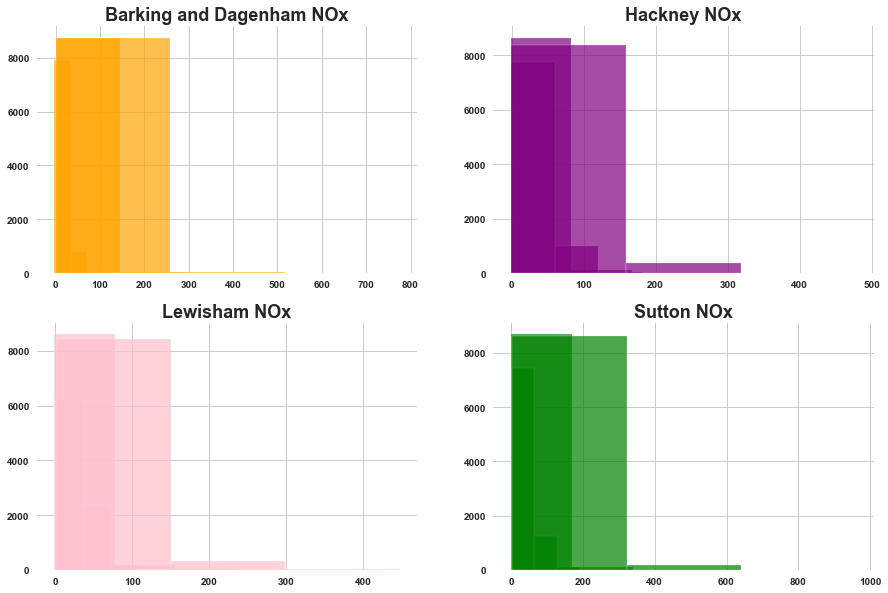

In [23]:
#From https://www.kaggle.com/amiiiney/keto-diet-products-kmeans-clustering
#Distribution of NOx values

plt.style.use('seaborn')
sns.set_style('whitegrid')

fig= plt.figure(figsize=(15,10))
#2 rows 2 cols

#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
plt.hist(df_readings_time.Barking_Dagenham_NO, bins=3, color='orange', alpha=0.7)
plt.hist(df_readings_time.Barking_Dagenham_NO2, bins=3, color='orange', alpha=0.7)
plt.hist(df_readings_time.Barking_Dagenham_NOx, bins=3, color='orange', alpha=0.7)
plt.title('Barking and Dagenham NOx',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

#first row sec col
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.hist(df_readings_time.Hackney_NO, bins=3, color='purple',alpha=0.7)
plt.hist(df_readings_time.Hackney_NO2, bins=3, color='purple',alpha=0.7)
plt.hist(df_readings_time.Hackney_NOx, bins=3, color='purple',alpha=0.7)
plt.title('Hackney NOx',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

#Second row first column
ax1 = plt.subplot2grid((2,2), (1, 0))
plt.hist(df_readings_time.Lewisham_NO, bins=3, color='pink', alpha=0.7)
plt.hist(df_readings_time.Lewisham_NO2, bins=3, color='pink', alpha=0.7)
plt.hist(df_readings_time.Lewisham_NOx, bins=3, color='pink', alpha=0.7)
plt.title('Lewisham NOx',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

#second row second column
ax1 = plt.subplot2grid((2,2), (1, 1))
plt.hist(df_readings_time.Sutton_NO, bins=3, color='green', alpha=0.7)
plt.hist(df_readings_time.Sutton_NO2, bins=3, color='green', alpha=0.7)
plt.hist(df_readings_time.Sutton_NOx, bins=3, color='green', alpha=0.7)
plt.title('Sutton NOx',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

plt.show()

### Visualising the Readings

In [24]:
print('Higest readings for NO:')
print(df_readings_borough.loc[df_readings_borough['NO'].idxmax()])

print('\nLowest readings for NO:')
print(df_readings_borough.loc[df_readings_borough['NO'].idxmin()])

print('\nHigest readings for NO2:')
print(df_readings_borough.loc[df_readings_borough['NO2'].idxmax()])

print('\nLowest readings for NO2:')
print(df_readings_borough.loc[df_readings_borough['NO2'].idxmin()])

print('\nHigest readings for NOx:')
print(df_readings_borough.loc[df_readings_borough['NOX'].idxmax()])

print('\nLowest readings for NOx:')
print(df_readings_borough.loc[df_readings_borough['NOX'].idxmin()])

Higest readings for NO:
Borough                         Sutton
ReadingDateTime    2020-01-21 07:00:00
NO2                              179.7
NOX                          961.79999
NO                           510.10001
Name: 26839, dtype: object

Lowest readings for NO:
Borough                         Sutton
ReadingDateTime    2020-09-16 02:00:00
NO2                               31.9
NOX                               29.3
NO                                -1.7
Name: 32570, dtype: object

Higest readings for NO2:
Borough                         Sutton
ReadingDateTime    2020-07-08 17:00:00
NO2                          191.60001
NOX                          347.10001
NO                               101.4
Name: 31625, dtype: object

Lowest readings for NO2:
Borough            Barking and Dagenham
ReadingDateTime     2020-12-03 03:00:00
NO2                                -3.8
NOX                                 2.8
NO                                  4.3
Name: 1707, dtype: object

Higest

Text(0.5, 1.0, 'Nitrogen oxides readings by borough in 2020')

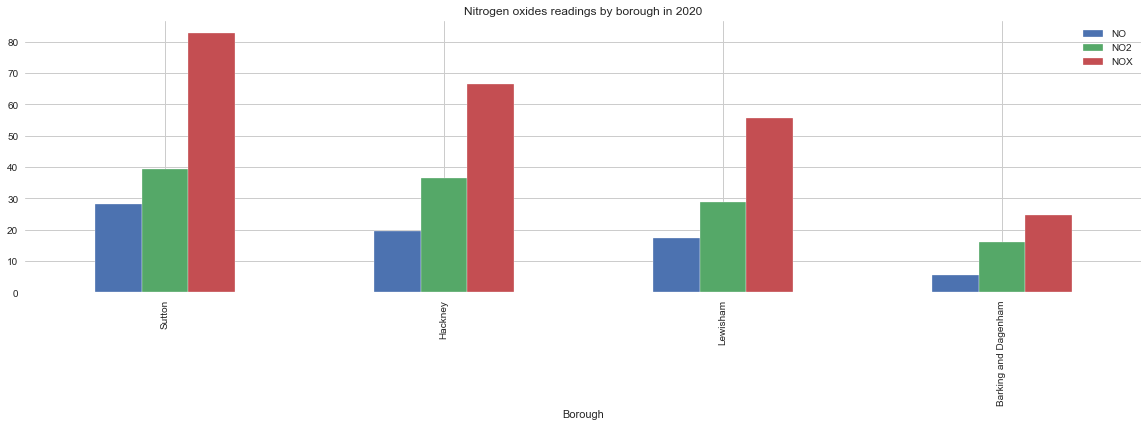

In [25]:
# From https://www.kaggle.com/fish0731/netflix-data-visualization-analysis
df_readings_borough[['NO','NO2','NOX', 'Borough']].groupby(['Borough']).mean().sort_values("NO2", ascending = False).plot.bar(figsize=(20,5))
plt.title('Nitrogen oxides readings by borough in 2020')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

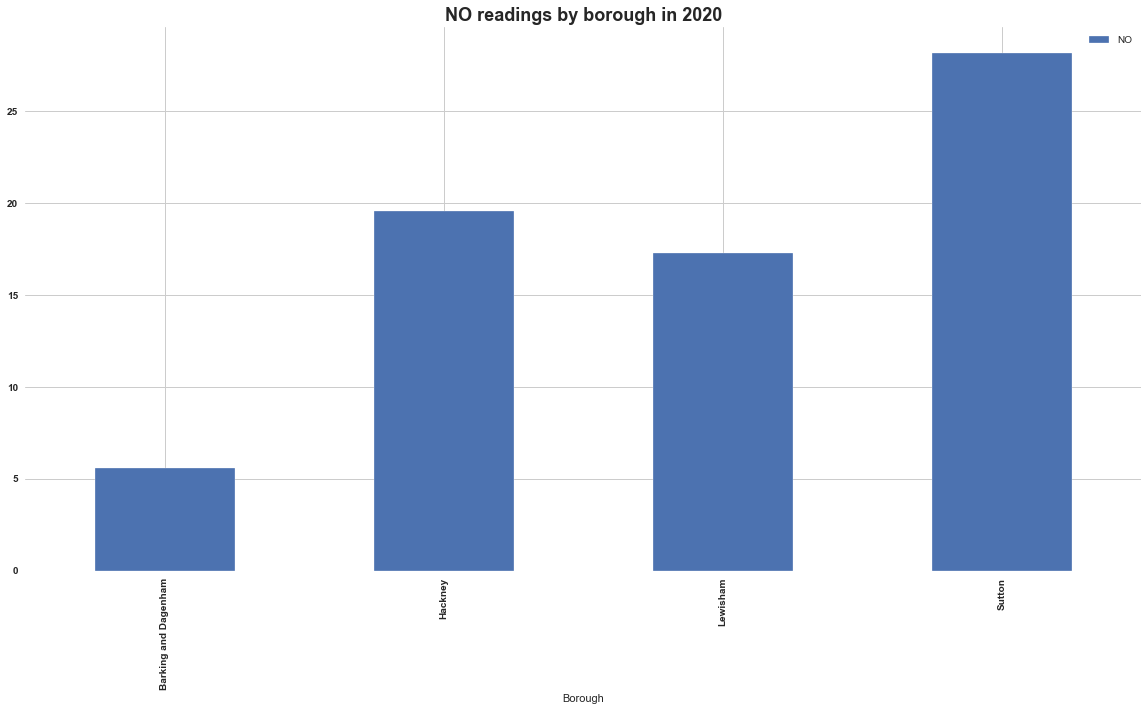

In [26]:
#From https://www.kaggle.com/guidosalimbeni/air-pollution-analysis-and-prediction
grp = df_readings_borough.groupby(["Borough"]).mean()["NO"].to_frame()
grp.plot.bar(figsize = (20,10))

plt.title('NO readings by borough in 2020',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

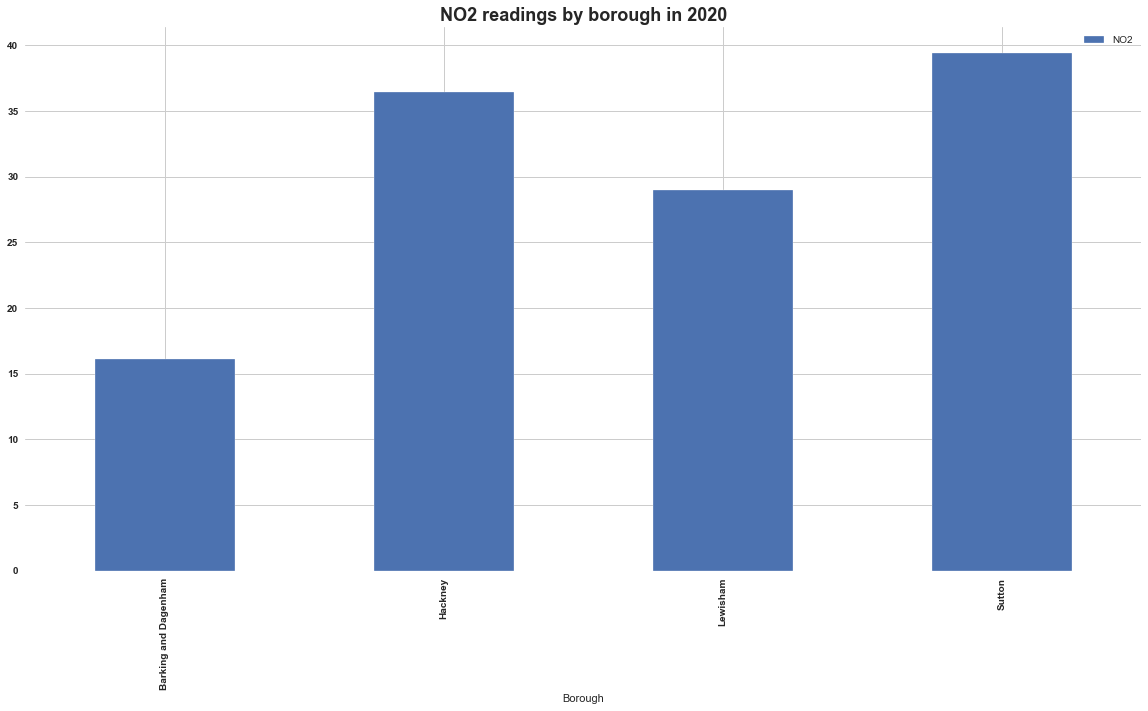

In [27]:
#From https://www.kaggle.com/guidosalimbeni/air-pollution-analysis-and-prediction
grp = df_readings_borough.groupby(["Borough"]).mean()["NO2"].to_frame()
grp.plot.bar(figsize = (20,10))

plt.title('NO2 readings by borough in 2020',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

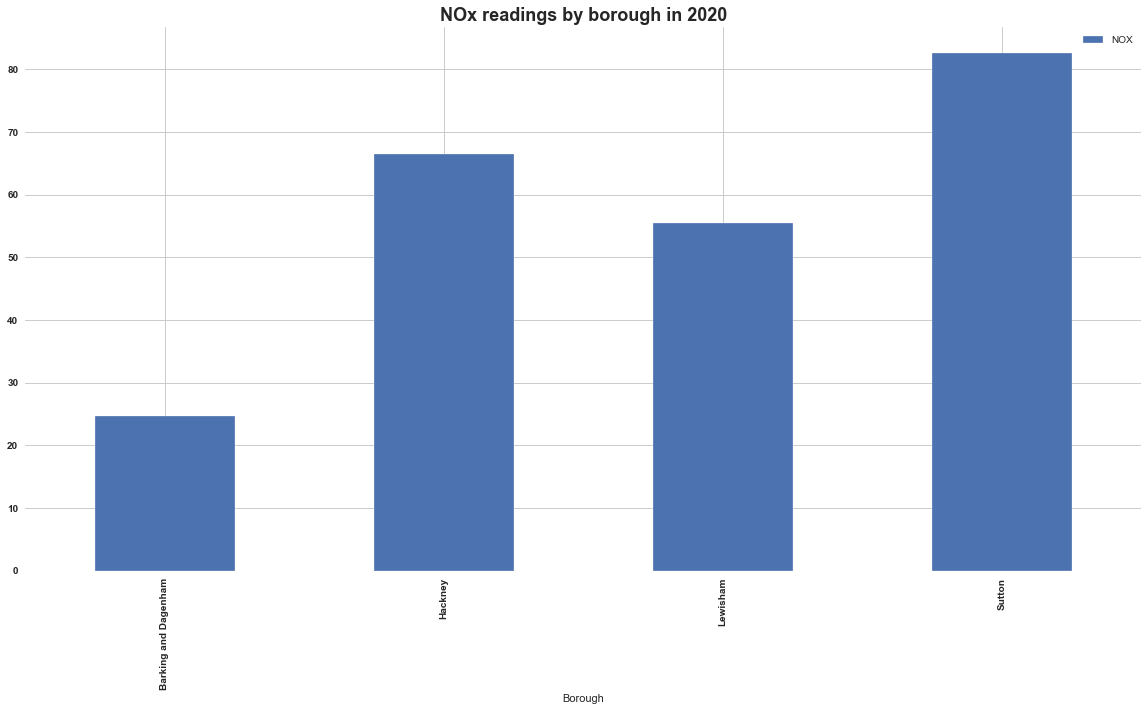

In [28]:
#From https://www.kaggle.com/guidosalimbeni/air-pollution-analysis-and-prediction
grp = df_readings_borough.groupby(["Borough"]).mean()["NOX"].to_frame()
grp.plot.bar(figsize = (20,10))

plt.title('NOx readings by borough in 2020',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

(array([438288, 439032, 439728, 440472, 441192, 441936, 442656, 443400,
        444144, 444864, 445608, 446328, 447071]),
 <a list of 13 Text major ticklabel objects>)

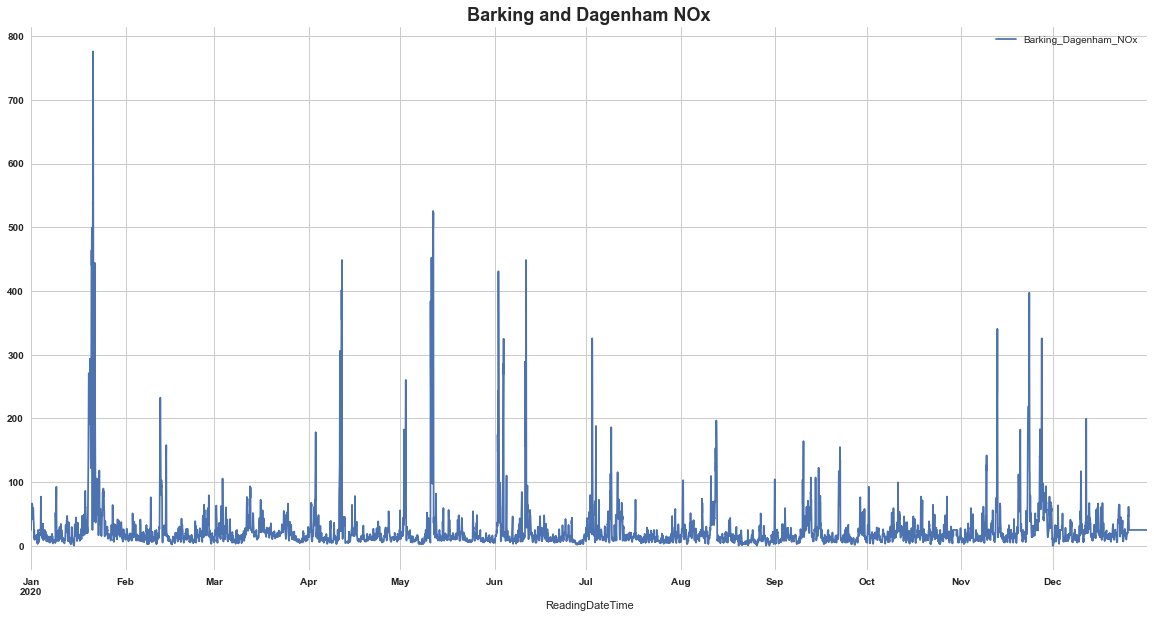

In [29]:
#From https://www.kaggle.com/guidosalimbeni/air-pollution-analysis-and-prediction
df_readings_time[['Barking_Dagenham_NOx','ReadingDateTime']].groupby(["ReadingDateTime"]).median().sort_values(by='ReadingDateTime',ascending=False).plot(figsize=(20,10))

plt.title('Barking and Dagenham NOx',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

(array([438288, 439032, 439728, 440472, 441192, 441936, 442656, 443400,
        444144, 444864, 445608, 446328, 447071]),
 <a list of 13 Text major ticklabel objects>)

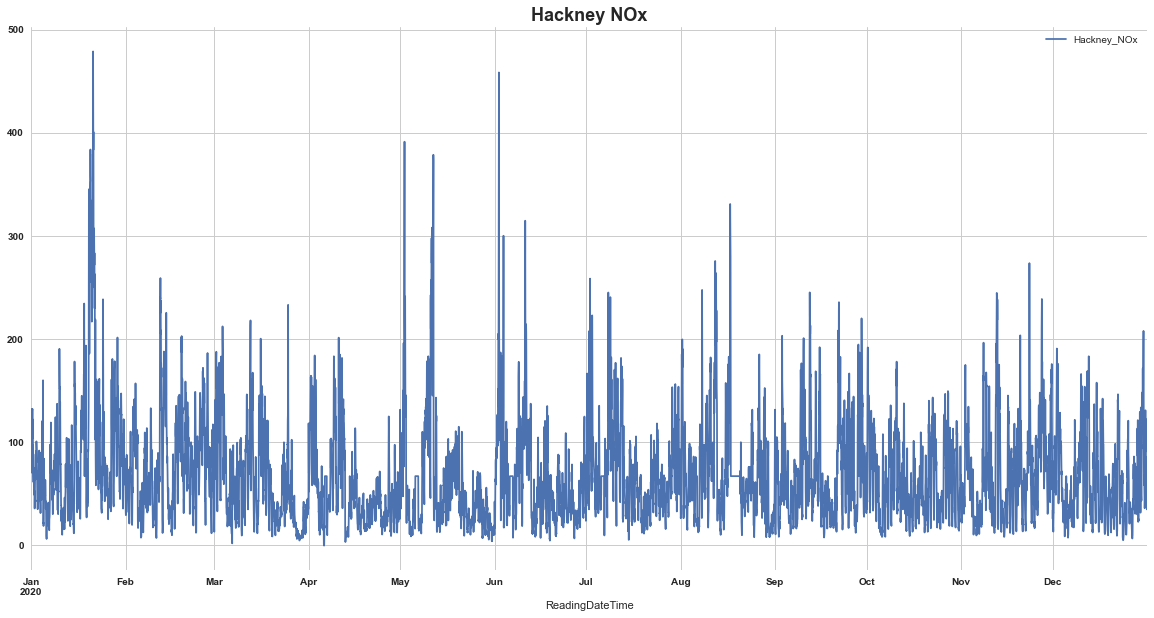

In [30]:
#From https://www.kaggle.com/guidosalimbeni/air-pollution-analysis-and-prediction
df_readings_time[['Hackney_NOx','ReadingDateTime']].groupby(["ReadingDateTime"]).median().sort_values(by='ReadingDateTime',ascending=False).plot(figsize=(20,10))

plt.title('Hackney NOx',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

(array([438288, 439032, 439728, 440472, 441192, 441936, 442656, 443400,
        444144, 444864, 445608, 446328, 447071]),
 <a list of 13 Text major ticklabel objects>)

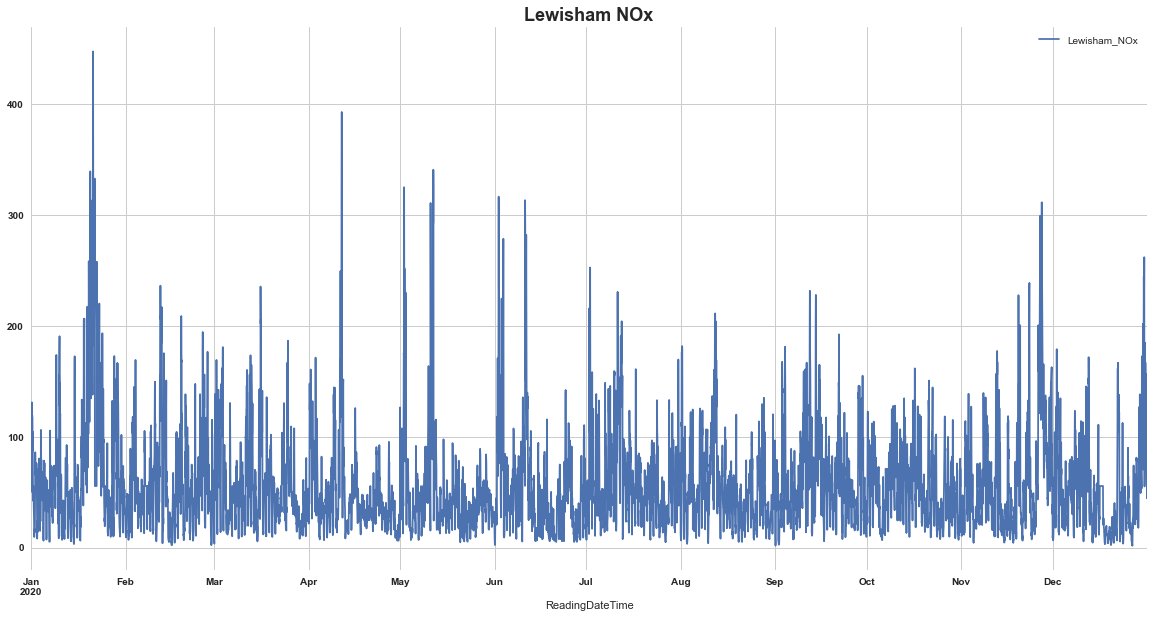

In [31]:
#From https://www.kaggle.com/guidosalimbeni/air-pollution-analysis-and-prediction
df_readings_time[['Lewisham_NOx','ReadingDateTime']].groupby(["ReadingDateTime"]).median().sort_values(by='ReadingDateTime',ascending=False).plot(figsize=(20,10))

plt.title('Lewisham NOx',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

(array([438288, 439032, 439728, 440472, 441192, 441936, 442656, 443400,
        444144, 444864, 445608, 446328, 447071]),
 <a list of 13 Text major ticklabel objects>)

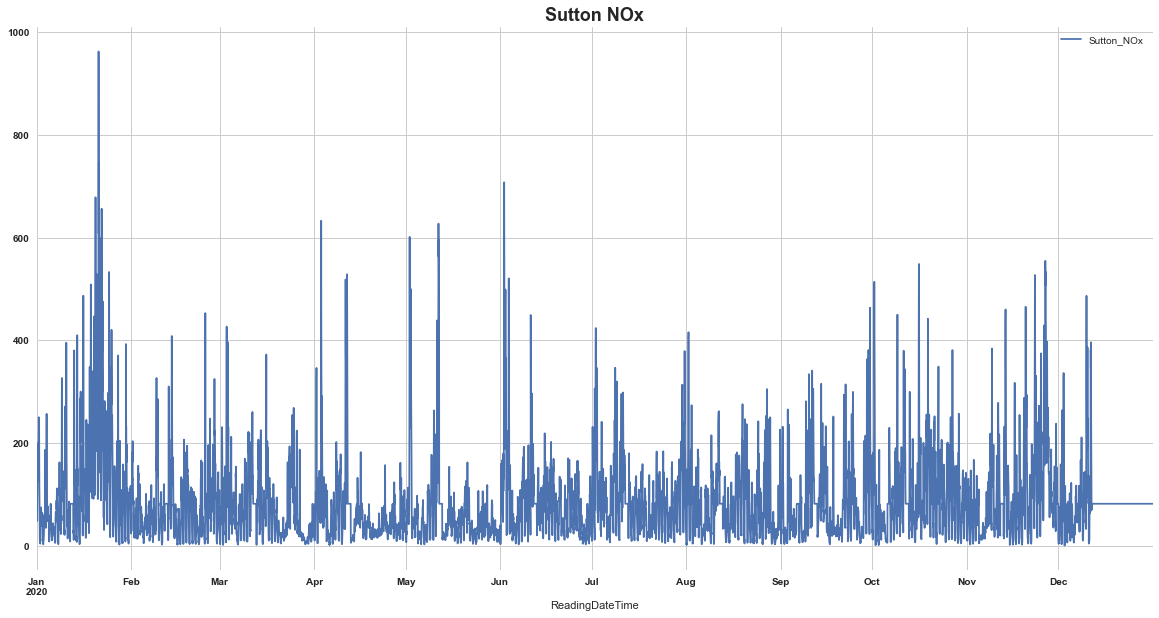

In [32]:
#From https://www.kaggle.com/guidosalimbeni/air-pollution-analysis-and-prediction
df_readings_time[['Sutton_NOx','ReadingDateTime']].groupby(["ReadingDateTime"]).median().sort_values(by='ReadingDateTime',ascending=False).plot(figsize=(20,10))

plt.title('Sutton NOx',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

(array([600]), <a list of 1 Text major ticklabel objects>)

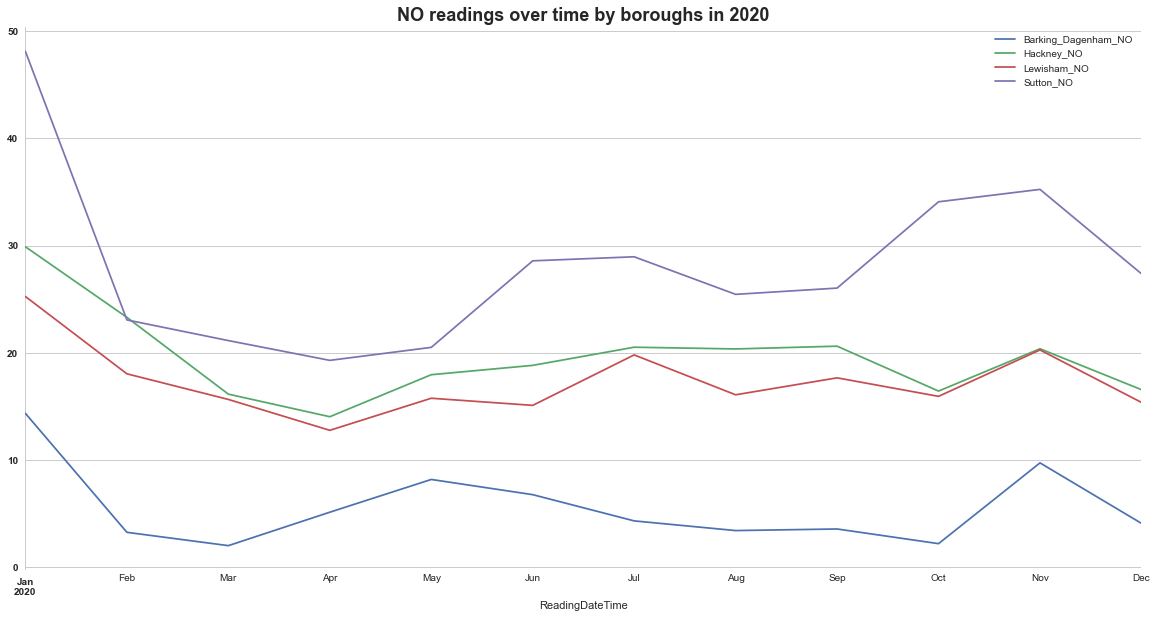

In [33]:
#From https://www.kaggle.com/guidosalimbeni/air-pollution-analysis-and-prediction

df_so2 = df_readings_time[["ReadingDateTime", 'Barking_Dagenham_NO', "Hackney_NO", "Lewisham_NO", 'Sutton_NO']]
df_so2 = df_so2.set_index("ReadingDateTime")
df_so2 = df_so2.dropna()
df_so2_resample = df_so2.resample(rule = "M").mean().ffill()

df_so2_resample.plot(figsize = (20,10))

plt.title('NO readings over time by boroughs in 2020',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

(array([600]), <a list of 1 Text major ticklabel objects>)

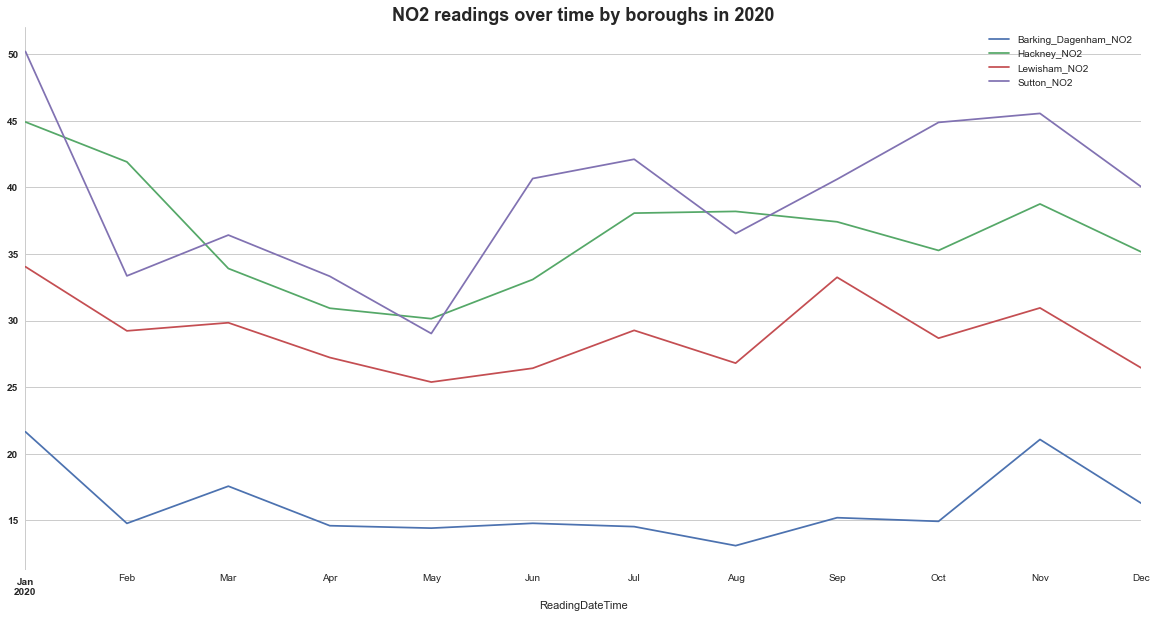

In [34]:
#From https://www.kaggle.com/guidosalimbeni/air-pollution-analysis-and-prediction

df_so2 = df_readings_time[["ReadingDateTime", 'Barking_Dagenham_NO2', "Hackney_NO2", "Lewisham_NO2", 'Sutton_NO2']]
df_so2 = df_so2.set_index("ReadingDateTime")
df_so2 = df_so2.dropna()
df_so2_resample = df_so2.resample(rule = "M").mean().ffill()

df_so2_resample.plot(figsize = (20,10))

plt.title('NO2 readings over time by boroughs in 2020',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

(array([600]), <a list of 1 Text major ticklabel objects>)

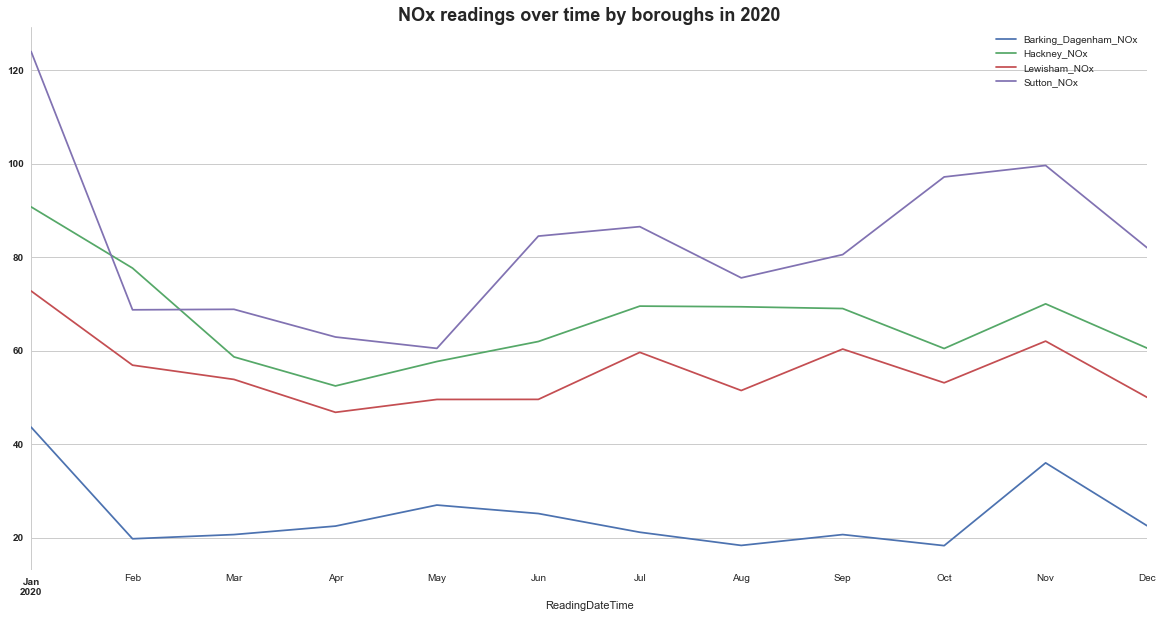

In [35]:
#From https://www.kaggle.com/guidosalimbeni/air-pollution-analysis-and-prediction

df_so2 = df_readings_time[["ReadingDateTime", 'Barking_Dagenham_NOx', "Hackney_NOx", "Lewisham_NOx", 'Sutton_NOx']]
df_so2 = df_so2.set_index("ReadingDateTime")
df_so2 = df_so2.dropna()
df_so2_resample = df_so2.resample(rule = "M").mean().ffill()

df_so2_resample.plot(figsize = (20,10))

plt.title('NOx readings over time by boroughs in 2020',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

### Merge Readings with Additinal Datasets

In [36]:
df_readings_borough["Borough"].unique() 

array(['Barking and Dagenham', 'Hackney', 'Lewisham', 'Sutton'],
      dtype=object)

In [37]:
#From https://www.kaggle.com/guidosalimbeni/air-pollution-analysis-and-prediction
df_mean = df_readings_borough.groupby(["Borough"]).mean().reset_index()
df_mean

,Borough,NO2,NOX,NO
0,Barking and Dagenham,16.08106,24.62397,5.57328
1,Hackney,36.45920,66.45351,19.56716
2,Lewisham,28.95166,55.48165,17.30180
3,Sutton,39.41351,82.63000,28.18465


In [38]:
#From from Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Data%20Science%20Week%204%20-%20Regression%20.ipynb

df_wage = pd.read_csv("data/hourly_wage_by_borough_2020.csv")
# RENAME columns
df_wage = df_wage.rename({'Area':'Borough'}, axis=1)
df_wage

,Borough,Hourly_Wage
0,Barking and Dagenham,13.10000
1,Barnet,15.15000
2,Bexley,16.44000
3,Brent,15.02000
4,Bromley,19.72000
5,Camden,18.91000
6,Croydon,15.61000
7,Ealing,15.33000
8,Enfield,14.55000
9,Greenwich,15.90000


In [39]:
#From from Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Data%20Science%20Week%204%20-%20Regression%20.ipynb

df_ethnic = pd.read_csv("data/ethic-group-by-borough_2020.csv")
# RENAME columns
df_ethnic = df_ethnic.rename({'Area':'Borough'}, axis=1)
df_ethnic

,Borough,White,Asian,Black,Mixed/ Other,Total
0,Barking and Dagenham,"109,000","54,000","36,000","15,000","215,000"
1,Barnet,"250,000","57,000","30,000","54,000","390,000"
2,Bexley,"195,000","17,000","21,000","15,000","248,000"
3,Brent,"102,000","107,000","62,000","56,000","328,000"
4,Bromley,"267,000","15,000","21,000","28,000","330,000"
5,Camden,"158,000","39,000","19,000","38,000","255,000"
6,Croydon,"227,000","70,000","64,000","24,000","386,000"
7,Ealing,"174,000","96,000","23,000","50,000","343,000"
8,Enfield,"206,000","37,000","74,000","20,000","337,000"
9,Greenwich,"178,000","39,000","48,000","19,000","284,000"


In [40]:
#From from Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Data%20Science%20Week%204%20-%20Regression%20.ipynb

#Merge datasets
df_combine = pd.merge(df_mean, df_ethnic)
df_combine_all = pd.merge(df_combine, df_wage)
df_combine_all

,Borough,NO2,NOX,NO,White,Asian,Black,Mixed/ Other,Total,Hourly_Wage
0,Barking and Dagenham,16.08106,24.62397,5.57328,"109,000","54,000","36,000","15,000","215,000",13.10000
1,Hackney,36.45920,66.45351,19.56716,"144,000","32,000","63,000","42,000","281,000",16.74000
2,Lewisham,28.95166,55.48165,17.30180,"193,000","23,000","58,000","30,000","305,000",16.46000
3,Sutton,39.41351,82.63000,28.18465,"147,000","36,000","11,000","10,000","204,000",15.80000


In [41]:
df_combine_all.dtypes

Borough          object
NO2             float64
NOX             float64
NO              float64
White            object
Asian            object
Black            object
Mixed/ Other     object
Total            object
Hourly_Wage     float64
dtype: object

In [42]:
#From from Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Data%20Science%20Week%204%20-%20Regression%20.ipynb

print("Before\n",df_combine_all.dtypes)
df_combine_all["White"] = df_combine_all['White'].str.replace(",","")
df_combine_all["White"] = pd.to_numeric(df_combine_all['White'])
df_combine_all["Asian"] = df_combine_all['Asian'].str.replace(",","")
df_combine_all["Asian"] = pd.to_numeric(df_combine_all['Asian'])
df_combine_all["Black"] = df_combine_all['Black'].str.replace(",","")
df_combine_all["Black"] = pd.to_numeric(df_combine_all['Black'])
df_combine_all["Mixed/ Other"] = df_combine_all['Mixed/ Other'].str.replace(",","")
df_combine_all["Mixed/ Other"] = pd.to_numeric(df_combine_all['Mixed/ Other'])
df_combine_all["Total"] = df_combine_all['Total'].str.replace(",","")
df_combine_all["Total"] = pd.to_numeric(df_combine_all['Total'])
print("After\n",df_combine_all.dtypes)

Before
 Borough          object
NO2             float64
NOX             float64
NO              float64
White            object
Asian            object
Black            object
Mixed/ Other     object
Total            object
Hourly_Wage     float64
dtype: object
After
 Borough          object
NO2             float64
NOX             float64
NO              float64
White             int64
Asian             int64
Black             int64
Mixed/ Other      int64
Total             int64
Hourly_Wage     float64
dtype: object


### Visualising Combined Datasets

In [43]:
df_combine_all

,Borough,NO2,NOX,NO,White,Asian,Black,Mixed/ Other,Total,Hourly_Wage
0,Barking and Dagenham,16.08106,24.62397,5.57328,109000,54000,36000,15000,215000,13.10000
1,Hackney,36.45920,66.45351,19.56716,144000,32000,63000,42000,281000,16.74000
2,Lewisham,28.95166,55.48165,17.30180,193000,23000,58000,30000,305000,16.46000
3,Sutton,39.41351,82.63000,28.18465,147000,36000,11000,10000,204000,15.80000


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

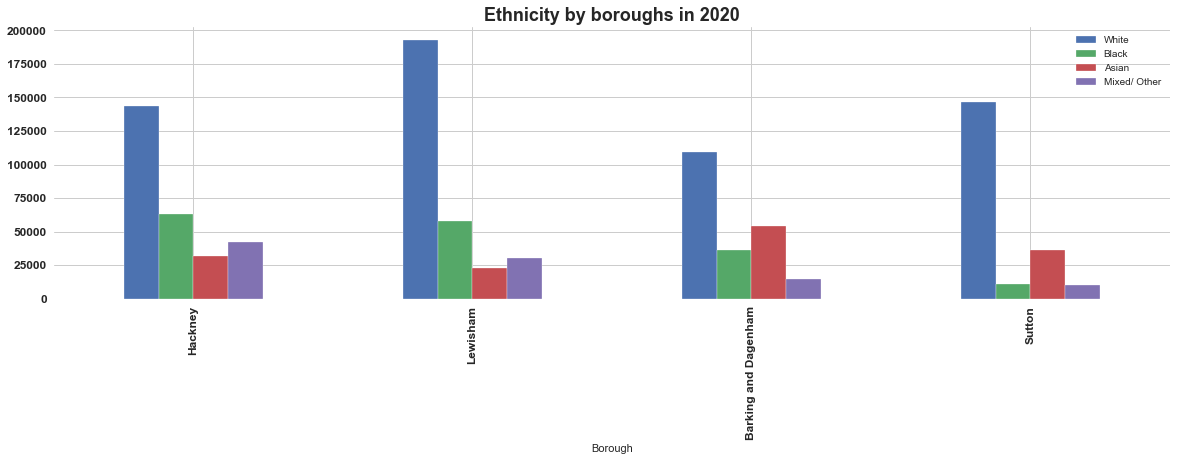

In [44]:
# From https://www.kaggle.com/fish0731/netflix-data-visualization-analysis

df_combine_all[['White','Black','Asian','Mixed/ Other', 'Borough']].groupby(['Borough']).mean().sort_values("Mixed/ Other", ascending = False).plot.bar(figsize=(20,5))

plt.title('Ethnicity by boroughs in 2020',weight='bold', fontsize=18)
plt.yticks(weight='bold', fontsize=12)
plt.xticks(weight='bold', fontsize=12)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

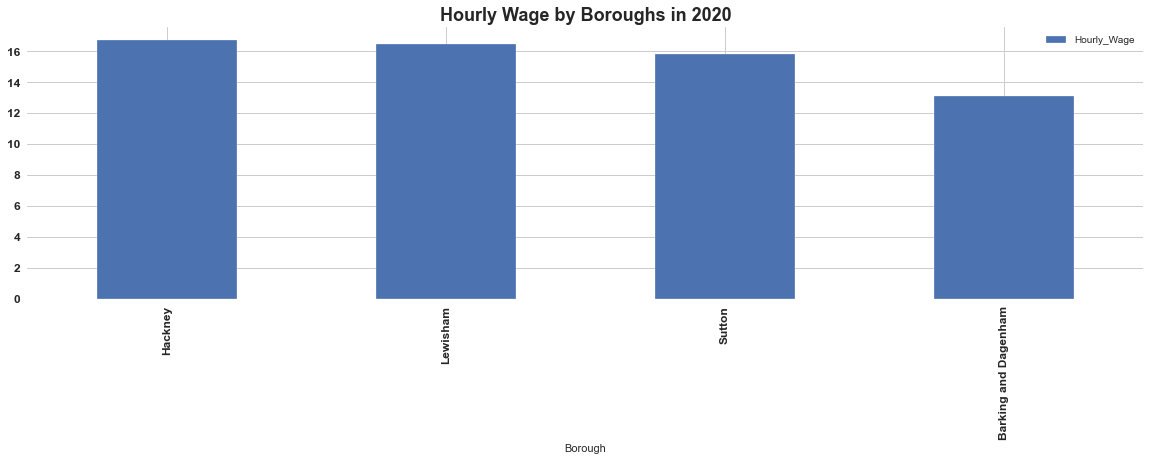

In [45]:
#From https://www.kaggle.com/guidosalimbeni/air-pollution-analysis-and-prediction
df_combine_all[['Hourly_Wage', 'Borough']].groupby(['Borough']).mean().sort_values("Hourly_Wage", ascending = False).plot.bar(figsize=(20,5))

plt.title('Hourly Wage by Boroughs in 2020',weight='bold', fontsize=18)
plt.yticks(weight='bold', fontsize=12)
plt.xticks(weight='bold', fontsize=12)

### Investigating the relationships between variables

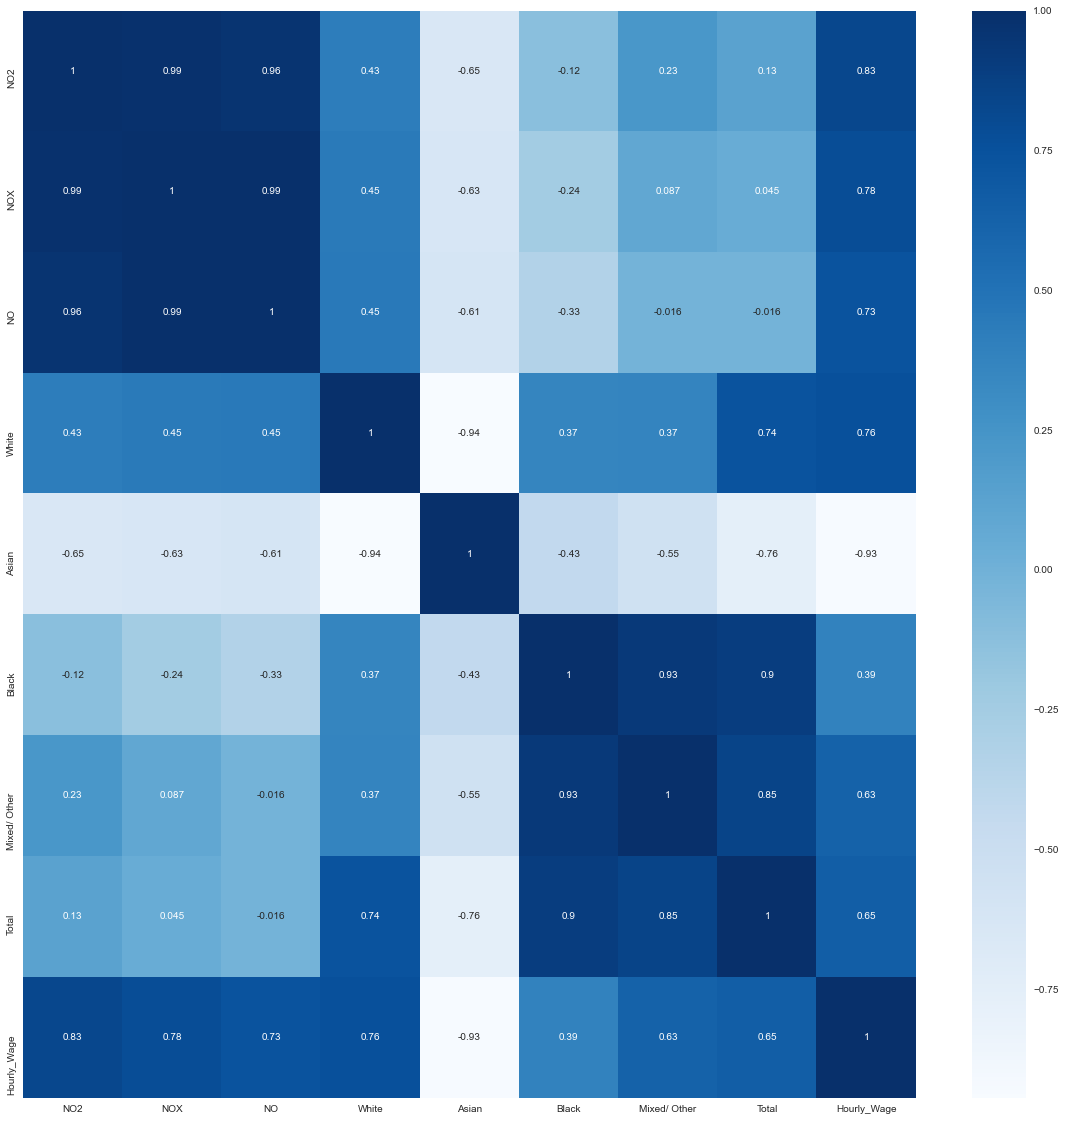

In [46]:
# From https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
# The correlation between different variables.
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(df_combine_all.corr(), cmap='Blues', annot = True)

plt.show()

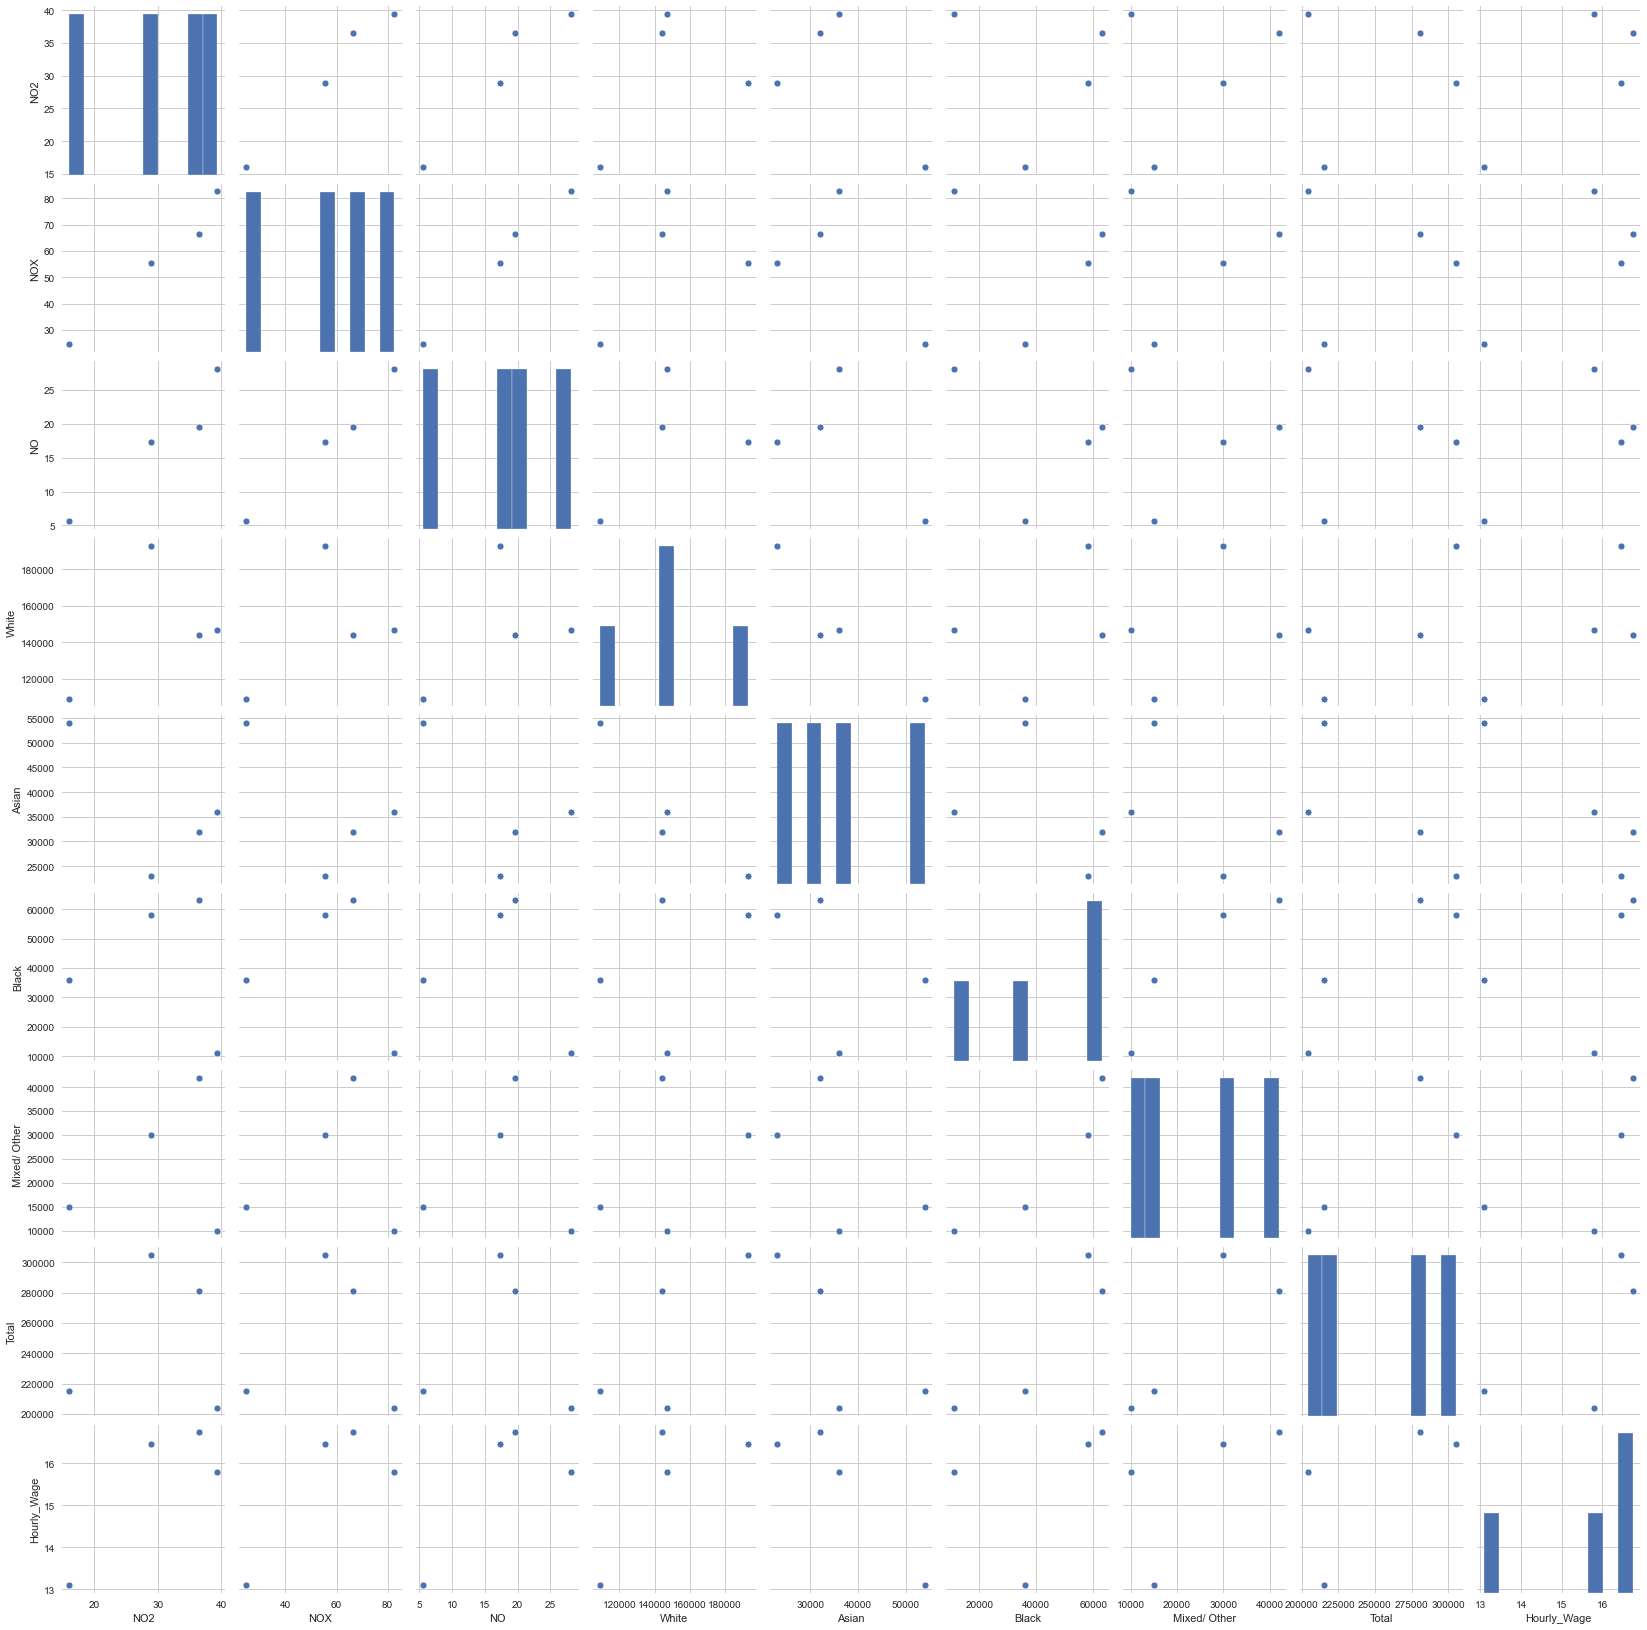

In [47]:
#From https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(df_combine_all)

### Building predictive models

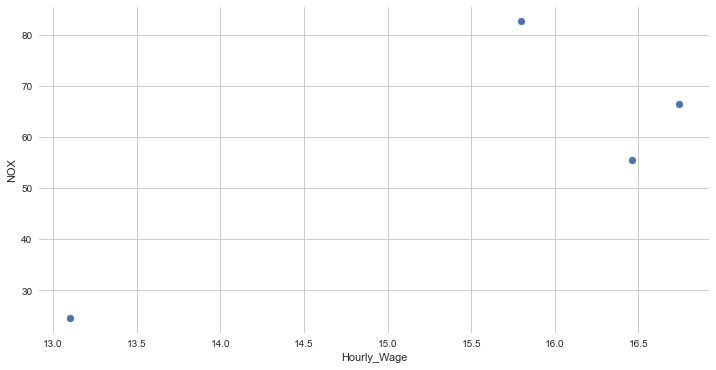

In [48]:
# From Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Data%20Science%20Week%204%20-%20Regression%20.ipynb

data = df_combine_all[["Hourly_Wage","NOX"]].values
x = data[:,0]
y = data[:,1]

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax
ax = plot_scatter(x,y,"Hourly_Wage","NOX")

In [49]:
# From Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Data%20Science%20Week%204%20-%20Regression%20.ipynb
#Correlation
from scipy import stats
r, p = stats.pearsonr(x,y)
r

0.7828153902564894

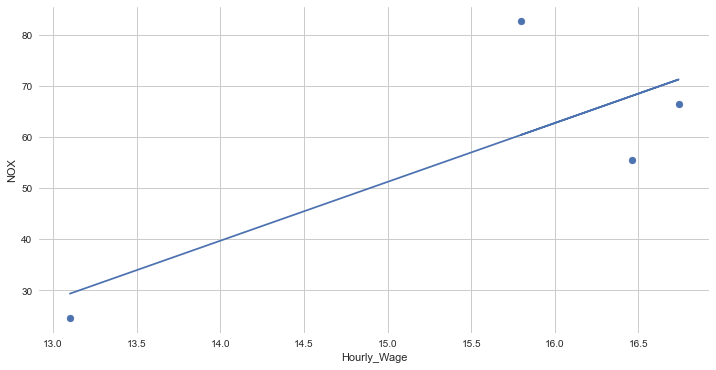

In [50]:
# From Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Data%20Science%20Week%204%20-%20Regression%20.ipynb

data = df_combine_all[["Hourly_Wage","NOX"]].values
x = data[:,0]
y = data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"Hourly_Wage","NOX")
ax.plot(x, model_y)

In [51]:
#Interpret our police model
slope, intercept

(11.51197, -121.4260407047168)

In [52]:
r

0.7828153902564893

In [53]:
p #scientific notation for numbers????

0.21718460974351067

In [54]:
# From Louis McCallum - https://git.arts.ac.uk/lmccallum/Intro-to-DS-2021/blob/master/Intro%20to%20Data%20Science%20Week%204%20-%20Regression%20.ipynb

x = df_combine_all[["Hourly_Wage","NO2"]]
y = df_combine_all["NOX"]

regr = linear_model.LinearRegression()
regr.fit(x, y) 
print(regr.coef_, regr.intercept_) 

[-1.8232642   2.56357518] 8.115921972868279


***

### Summary of the Data Analysis

- The dataset is a collection of air quality readings for the boroughs of Sutton, Hackney, Lewisham and Barking and Dagenham.
- One of the largest part of cleaning the dataset was to replace the missing values. There were missing values for the NO, NO2 and NOX for all sites which was replaced with each boroughs category mean. 
- According to initial information the highest peak of the year was documented in Sutton for all categories and the lowest point in NO. Barking and Dagenham has the lowest NO2 points and Hackney has the lowest NOX point.
- Overall, Sutton has the highest readings in all catagories and Barking and Dagenham has the lowest.
- The monthly trend is similar in all boroughs with a spike in late January and appearing lowest during spring time.
- The buroughs with the largest proportion of ethnic minority groups has the least pollution
- The buroughs with the lowest hourly wages have the least pollution. There is a correlation between higher hourly wages and more pollution.

***

### References

Tagle, T. (2021). A Beginner’s Guide to NOx, NO and NO2 as Air Pollutants. *aeroqual.com*. Published: Dec 13, 2018. Available at https://www.aeroqual.com/meet-the-nitrogen-oxide-family.